# **Visualisation et statistiques descriptives**
---

## Introduction<a class="anchor" id="partie1"></a>

Ce notebook contient les codes nécessaires à la visualisation et les statistiques descriptives de notre base de données.

## Sommaire

* [Introduction](#partie1)
* [Statistiques descriptives](#partie2)
    * [Visualisation et nettoyage des données manquantes](#partie21)
    * [Statistiques descriptives intra-pays](#partie22)
        * [Résumé statistique des variables](#partie221)
        * [Étude des corrélations](#partie222)
    * [Statistiques descriptives inter-pays](#partie23)
    * [Une première analyse exploratoire des séries temporelles](#partie24)
        * [Données du PIB](#partie241)
        * [Données des Working Hours](#partie242)
        * [Données des taux d'intérêt à long terme](#partie243)
        * [Données des taux d'intérêt à court terme](#partie244)
        * [Données du CPI](#partie235)
        * [Données de la croissance potentielle](#partie246)
* [Visualisation](#partie3)
    * [Données de PIB](#partie31)
    * [Données d'heures de travail](#partie32)


In [11]:
!pip install -r requirements.txt

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.graphics.tsaplots as tsaplots
from scipy.signal import savgol_filter

from Codes.scrpits_visualisations import (
    tracer_evolution,
    camembert,
    comparer_periodes
)


In [98]:
# Importation des données
df = pd.read_excel("Données_produites/base_de_données_v1.xlsx")


# Indexation
df = df.set_index('Unnamed: 0')



## Statistiques descriptives <a class="anchor" id="partie2"></a>

### Visualisation des données manquantes <a class="anchor" id="partie21"></a>

Dans une volonté de rendre compte des valeurs manquantes à notre dataframe nous créons un dataframe qui comprend l'ensemble des valeurs manquantes 

In [14]:
df_missing_binary = df.isnull().astype(int)
df_missing_binary

,CPI_Austria,PIB_Austria,LT_IR_Austria,ST_IR_Austria,WH_Austria,P_Growth_Austria,CPI_Belgium,PIB_Belgium,LT_IR_Belgium,ST_IR_Belgium,WH_Belgium,P_Growth_Belgium,CPI_Bulgaria,PIB_Bulgaria,LT_IR_Bulgaria,ST_IR_Bulgaria,WH_Bulgaria,P_Growth_Bulgaria,CPI_Czechia,PIB_Czechia,LT_IR_Czechia,ST_IR_Czechia,WH_Czechia,P_Growth_Czechia,CPI_Denmark,PIB_Denmark,LT_IR_Denmark,ST_IR_Denmark,WH_Denmark,P_Growth_Denmark,CPI_Estonia,PIB_Estonia,LT_IR_Estonia,ST_IR_Estonia,WH_Estonia,P_Growth_Estonia,CPI_Finland,PIB_Finland,LT_IR_Finland,ST_IR_Finland,WH_Finland,P_Growth_Finland,CPI_France,PIB_France,LT_IR_France,ST_IR_France,WH_France,P_Growth_France,CPI_Germany,PIB_Germany,LT_IR_Germany,ST_IR_Germany,WH_Germany,P_Growth_Germany,CPI_Greece,PIB_Greece,LT_IR_Greece,ST_IR_Greece,WH_Greece,P_Growth_Greece,CPI_Hungary,PIB_Hungary,LT_IR_Hungary,ST_IR_Hungary,WH_Hungary,P_Growth_Hungary,CPI_Iceland,PIB_Iceland,LT_IR_Iceland,ST_IR_Iceland,WH_Iceland,P_Growth_Iceland,CPI_Ireland,PIB_Ireland,LT_IR_Ireland,ST_IR_Ireland,WH_Ireland,P_Growth_Ireland,CPI_Italy,PIB_Italy,LT_IR_Italy,ST_IR_Italy,WH_Italy,P_Growth_Italy,CPI_Latvia,PIB_Latvia,LT_IR_Latvia,ST_IR_Latvia,WH_Latvia,P_Growth_Latvia,CPI_Lithuania,PIB_Lithuania,LT_IR_Lithuania,ST_IR_Lithuania,WH_Lithuania,P_Growth_Lithuania,CPI_Luxembourg,PIB_Luxembourg,LT_IR_Luxembourg,ST_IR_Luxembourg,WH_Luxembourg,P_Growth_Luxembourg,CPI_Netherlands,PIB_Netherlands,LT_IR_Netherlands,ST_IR_Netherlands,WH_Netherlands,P_Growth_Netherlands,CPI_Norway,PIB_Norway,LT_IR_Norway,ST_IR_Norway,WH_Norway,P_Growth_Norway,CPI_Poland,PIB_Poland,LT_IR_Poland,ST_IR_Poland,WH_Poland,P_Growth_Poland,CPI_Portugal,PIB_Portugal,LT_IR_Portugal,ST_IR_Portugal,WH_Portugal,P_Growth_Portugal,CPI_Romania,PIB_Romania,LT_IR_Romania,ST_IR_Romania,WH_Romania,P_Growth_Romania,CPI_Slovakia,PIB_Slovakia,LT_IR_Slovakia,ST_IR_Slovakia,WH_Slovakia,P_Growth_Slovakia,CPI_Slovenia,PIB_Slovenia,LT_IR_Slovenia,ST_IR_Slovenia,WH_Slovenia,P_Growth_Slovenia,CPI_Spain,PIB_Spain,LT_IR_Spain,ST_IR_Spain,WH_Spain,P_Growth_Spain,CPI_Sweden,PIB_Sweden,LT_IR_Sweden,ST_IR_Sweden,WH_Sweden,P_Growth_Sweden,CPI_Switzerland,PIB_Switzerland,LT_IR_Switzerland,ST_IR_Switzerland,WH_Switzerland,P_Growth_Switzerland,CPI_United_Kingdom,PIB_United_Kingdom,LT_IR_United_Kingdom,ST_IR_United_Kingdom,WH_United_Kingdom,P_Growth_United_Kingdom,inflation_Austria,inflation_Belgium,inflation_Bulgaria,inflation_Czechia,inflation_Denmark,inflation_Estonia,inflation_Finland,inflation_France,inflation_Germany,inflation_Greece,inflation_Hungary,inflation_Iceland,inflation_Ireland,inflation_Italy,inflation_Latvia,inflation_Lithuania,inflation_Luxembourg,inflation_Netherlands,inflation_Norway,inflation_Poland,inflation_Portugal,inflation_Romania,inflation_Slovakia,inflation_Slovenia,inflation_Spain,inflation_Sweden,inflation_Switzerland,inflation_United
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-Q1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1995-Q2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1995-Q3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,

In [15]:
df_nan = df.isna()
df_nan = pd.DataFrame({
    "TIME_PERIOD_WITH_NAN": df_nan.apply(lambda col: list(df.index[col]), axis = 0)
})
df_nan.to_csv("df_nan.csv", index=True, encoding="utf-8")
print(df_nan)

                                                      TIME_PERIOD_WITH_NAN
CPI_Austria                           [1995-Q1, 1995-Q2, 1995-Q3, 1995-Q4]
PIB_Austria                                                             []
LT_IR_Austria                                                           []
ST_IR_Austria                                                           []
WH_Austria                                                              []
P_Growth_Austria         [2021-Q4, 2022-Q1, 2022-Q2, 2022-Q3, 2022-Q4, ...
CPI_Belgium                           [1995-Q1, 1995-Q2, 1995-Q3, 1995-Q4]
PIB_Belgium                                                             []
LT_IR_Belgium                                                           []
ST_IR_Belgium                                                           []
WH_Belgium                                                              []
P_Growth_Belgium         [2021-Q4, 2022-Q1, 2022-Q2, 2022-Q3, 2022-Q4, ...
CPI_Bulgaria             

KeyboardInterrupt: 

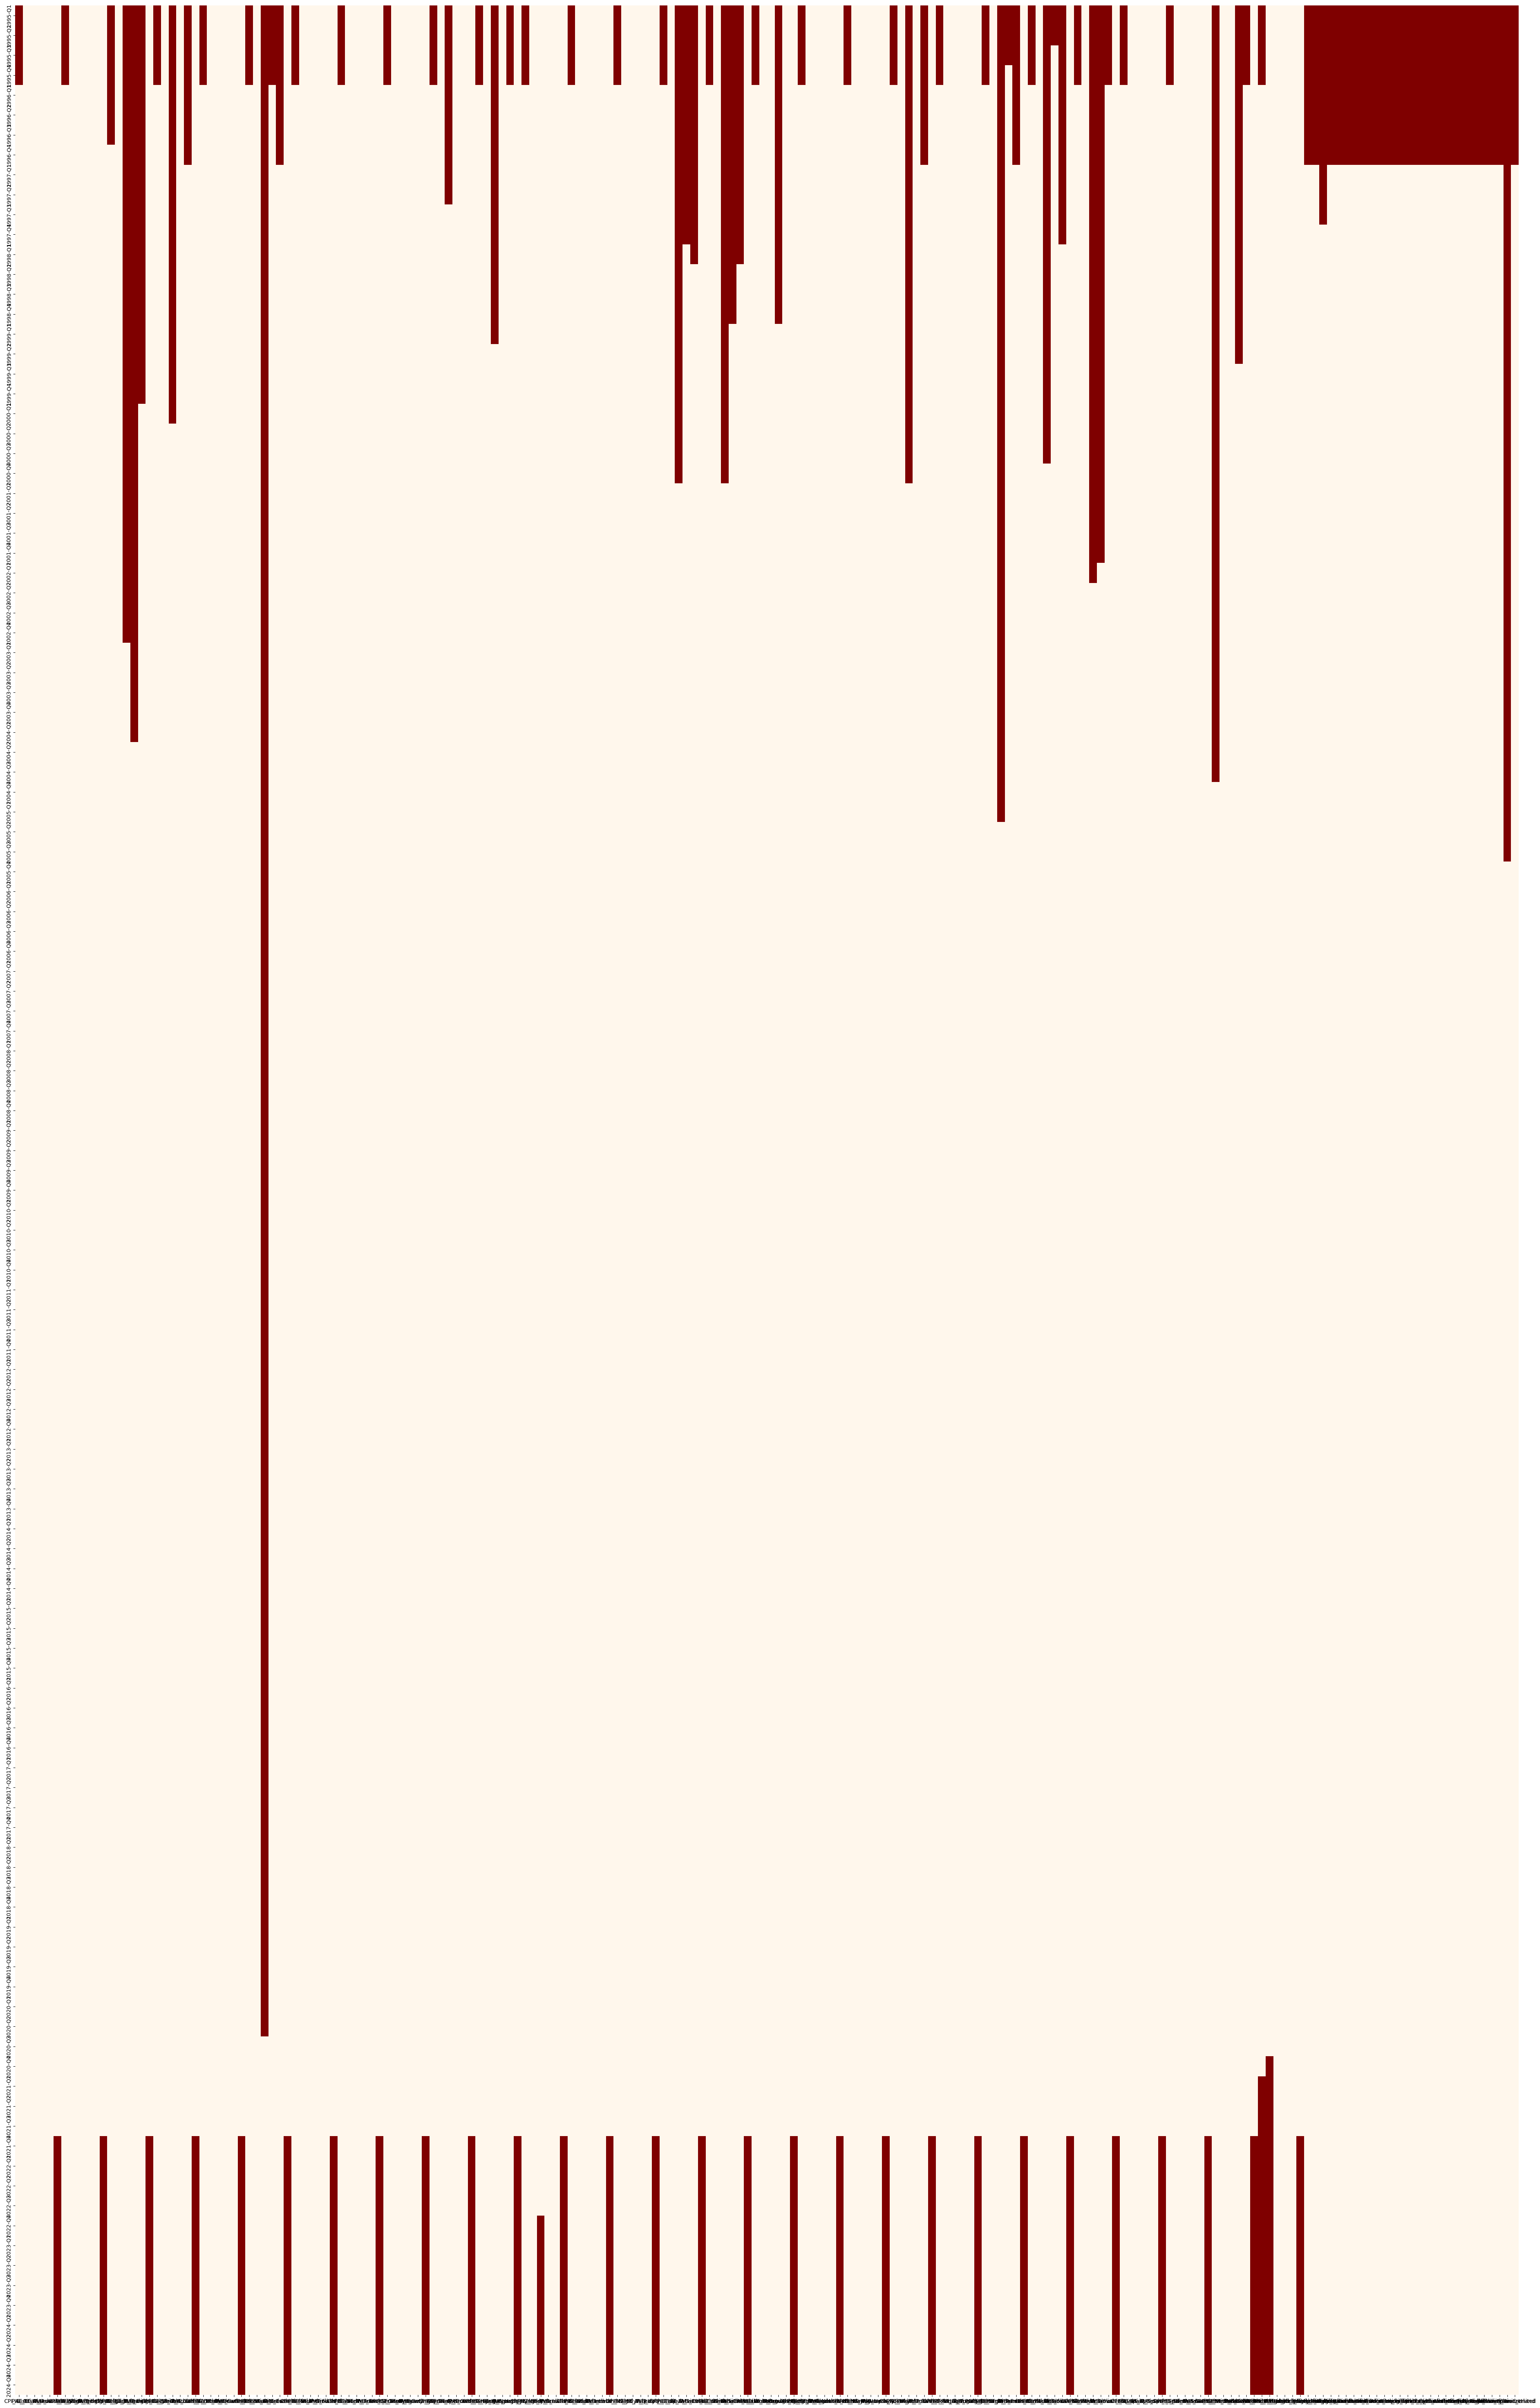

In [16]:
# Définir la figure avec un affichage interactif
fig, ax = plt.subplots(figsize=(50, 80))

# Utiliser seaborn pour une meilleure visualisation sans grille
sns.heatmap(df_missing_binary, cmap="OrRd", cbar=False, linewidths=0, ax=ax, square=False)

# Ajouter un titre
ax.set_title("Matrice des valeurs manquantes (Rouge = Manquant)")

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Afficher la figure
plt.show()

In [ ]:
#Pourcentage de données manquantes par variable
percentage_missing=((df_missing_binary.sum())/df_missing_binary.shape[0])*100

#On ne garde que les colonnes ayant des missing values
percentage_missing=percentage_missing[percentage_missing>0]
percentage_missing = percentage_missing.sort_values(ascending=False)

'''
Nous avons un problème avec l'Estonie, 85% des données pour les taux d'intérêt sont des valeurs manquantes
J'ai revérifié sur le site de l'OCDE et c'est un problème qui vient de leur bases de données. Comme c'est une 
un pourcentage considérable, on devrait peut-être retirer l'Estonie de notre analyse

Pour les données qui sont "entrecoupées" (on dirait un chemin de la route)--> c'est les Working Hours. On peut appliquer le même 
interpolation qu'on a faite pour construire le df. 

--> Voir tentative d'interpolation dans le notebook data.ipynb
Un problème persiste avec les données qui sont au début ou à la fin de la période temporelle, il faudra envisager
une autre méthode
'''
percentage_missing


### Nettoyage des données manquantes <a class="anchor" id="partie21"></a>

Ce qui suit est une proposition

In [ ]:
#Fonction qui construit un vecteur contenant le nom des variables
def variables_pays(pays):
    variable_pays=[f'CPI_{pays}',f'PIB_{pays}',f'LT_IR_{pays}',f'ST_IR_{pays}',f'WH_{pays}',f'P_Growth_{pays}']
    return(variable_pays)

In [ ]:
#On élimine l'année 1995 pour éviter de faire du "backcasting" du CPI de tous les pays
df_clean=df.copy()
df_clean=df_clean.drop(["1995-Q1","1995-Q2","1995-Q3","1995-Q4"])

#On élimine l'Estonie de notre dataset
Estonia=variables_pays("Estonia")
df_clean=df_clean.drop(Estonia, axis=1)
df_clean


,CPI_Austria,PIB_Austria,LT_IR_Austria,ST_IR_Austria,WH_Austria,P_Growth_Austria,CPI_Belgium,PIB_Belgium,LT_IR_Belgium,ST_IR_Belgium,...,inflation_Norway,inflation_Poland,inflation_Portugal,inflation_Romania,inflation_Slovakia,inflation_Slovenia,inflation_Spain,inflation_Sweden,inflation_Switzerland,inflation_United
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1996-Q1,71.553333,44641.2,6.396633,3.476667,39.8,2.573010,70.003333,54240.0,6.640000,3.350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-Q2,71.716667,46885.1,6.505600,3.266667,39.9,2.577419,70.516667,55590.7,6.713333,3.243333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-Q3,71.763333,46969.6,6.430133,3.420000,40.0,2.580149,70.446667,53541.2,6.616667,3.230000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-Q4,72.053333,47418.5,5.953500,3.330000,40.1,2.581239,70.936667,56570.4,6.000000,3.043333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-Q1,72.463333,44369.0,5.709800,3.323333,40.2,2.580730,71.246667,53907.0,5.796667,3.203333,...,3.269231,17.188694,2.534330,116.062802,6.014689,8.149648,2.536778,1.157825,NaN,1.86001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-Q4,132.593333,122280.3,3.125533,3.957456,32.9,NaN,127.550000,158085.7,3.150000,3.957456,...,4.289056,6.285155,2.445435,7.408689,7.074750,4.968619,3.337594,3.019142,1.888900,0.00000
2024-Q1,133.326667,117154.2,2.835333,3.923615,34.0,NaN,129.700000,147812.8,2.890000,3.923615,...,4.220611,3.638082,2.463167,7.051174,3.632150,3.380074,3.235294,2.793953,1.281402,0.00000
2024-Q2,134.366667,120629.4,3.013533,3.808172,32.9,NaN,131.086667,154840.7,3.063333,3.808172,...,2.754612,2.915992,3.074050,5.784928,2.495091,2.370816,3.585946,2.074426,1.380807,0.00000


In [ ]:
df_clean_missing_binary = df_clean.isnull().astype(int)

# Définir la figure avec un affichage interactif
fig, ax = plt.subplots(figsize=(50, 80))

# Utiliser seaborn pour une meilleure visualisation sans grille
sns.heatmap(df_clean_missing_binary, cmap="OrRd", cbar=False, linewidths=0, ax=ax, square=False)

# Ajouter un titre
ax.set_title("Matrice des valeurs manquantes (Rouge = Manquant)")

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Afficher la figure
plt.show()

In [ ]:
#Pourcentage de données manquantes par variable
percentage_missing_clean=((df_clean_missing_binary.sum())/df_clean_missing_binary.shape[0])*100

#On ne garde que les colonnes ayant des missing values
percentage_missing_clean=percentage_missing_clean[percentage_missing_clean>0]
percentage_missing_clean = percentage_missing_clean.sort_values(ascending=False)
percentage_missing_clean

Quelques lignes de code préliminaires

In [ ]:
#Création d'une copie de la base de données ayant pour index des DateTime
df_TS=df.copy()
df_TS.index = pd.PeriodIndex(df.index, freq='Q')  #conversion en PeriodIndex
df_TS.index = df_TS.index.to_timestamp() #Conversion en DateTime
print(type(df.index))

''' 
Ici je ne suis pas sûr:
- pour faire des analyses en séries temporelles, il faut que les index soient des datetime
- j'ai donc converti chaque trimestre en la première date de chaque trimestre. 
- pour des graphes, et pour transformer les sorties, on peut utiliser : df.index.strftime('%Y-Q%q')
- je ne sais pas s'il y a une meileure façon de faire

'''


<class 'pandas.core.indexes.base.Index'>


" \nIci je ne suis pas sûr:\n- pour faire des analyses en séries temporelles, il faut que les index soient des datetime\n- j'ai donc converti chaque trimestre en la première date de chaque trimestre. \n- pour des graphes, et pour transformer les sorties, on peut utiliser : df.index.strftime('%Y-Q%q')\n- je ne sais pas s'il y a une meileure façon de faire\n\n"

In [ ]:
#On divise le df en 3 (correspondant à chaque période)
df_TS_before_2008 = df_TS.loc[df_TS.index < '2008-01-01'].copy()
df_TS_after_2008 = df_TS.loc[(df_TS.index >= '2008-01-01') & (df_TS.index<'2020-01-01')].copy()
df_TS_after_2020 = df_TS.loc[df_TS.index >= '2020-01-01'].copy()


In [ ]:
#Synthèse avant 2008
df_TS_before_2008.describe()

In [ ]:
#Synthèse après 2008
df_TS_after_2008.describe()

In [ ]:
#Synthèse après 2020
df_TS_after_2020.describe()

### Statistiques descriptives inter-pays <a class="anchor" id="partie23"></a>

#### Statistiques par types de variables <a class="anchor" id="partie231"></a>

In [ ]:
# Réglages d'affichage
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)    
pd.set_option('display.width', 1000) 

In [31]:
group_dict = {
    # Économie en développement
    "Czechia": "developing",
    "Lithuania": "developing",
    "Latvia": "developing",
    "Poland": "developing",
    "Bulgaria": "developing",
    "Slovakia": "developing",
    "Hungary": "developing",
    "Slovenia": "developing",
    "Iceland": "developing",
    "Estonia": "developing",
    "Romania": "developing",

    # Grande économie développée
    "Germany": "large_developed",
    "United_Kingdom": "large_developed",
    "France": "large_developed",
    "Italy": "large_developed",
    "Spain": "large_developed",
    "Netherlands": "large_developed",

    # Petite économie développée
    "Austria": "small_developed",
    "Belgium": "small_developed",
    "Denmark": "small_developed",
    "Greece": "small_developed",
    "Finland": "small_developed",
    "Ireland": "small_developed",
    "Luxembourg": "small_developed",
    "Norway": "small_developed",
    "Portugal": "small_developed",
    "Sweden": "small_developed",
    "Switzerland": "small_developed"
}
pib_columns_developing = [f"PIB_{country}" for country, group in group_dict.items() if group == "developing"]
pib_columns_large_developed = [f"PIB_{country}" for country, group in group_dict.items() if group == "large_developed"]
pib_columns_small_developed = [f"PIB_{country}" for country, group in group_dict.items() if group == "small_developed"]

##### CPI <a class="anchor" id="partie2311"></a>

In [ ]:
colonnes_CPI = [colonne for colonne in df_TS.columns if colonne.startswith('CPI')]
CPI = df[colonnes_CPI]
CPI.describe()

,CPI_Austria,CPI_Belgium,CPI_Bulgaria,CPI_Czechia,CPI_Denmark,CPI_Estonia,CPI_Finland,CPI_France,CPI_Germany,CPI_Greece,CPI_Hungary,CPI_Iceland,CPI_Ireland,CPI_Italy,CPI_Latvia,CPI_Lithuania,CPI_Luxembourg,CPI_Netherlands,CPI_Norway,CPI_Poland,CPI_Portugal,CPI_Romania,CPI_Slovakia,CPI_Slovenia,CPI_Spain,CPI_Sweden,CPI_Switzerland,CPI_United_Kingdom
count,116.000000,116.000000,113.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,81.000000,100.000000
mean,93.360690,93.589943,87.633392,94.581322,92.873851,88.850776,92.051638,94.097730,94.562356,91.633218,87.530546,79.519655,94.114080,92.005172,87.761466,92.521379,91.050144,93.778621,94.798276,91.740805,92.405259,78.268764,89.759080,88.913391,91.732902,95.888161,101.110947,86.798333
std,16.913360,16.729539,26.622093,22.115578,13.033148,28.356047,13.644561,13.138351,14.207280,15.619174,33.181098,26.393812,12.998984,14.699187,27.571884,24.666300,17.078349,16.289366,17.673126,23.735309,14.702079,38.872473,24.729723,21.306544,16.145513,13.970701,2.331400,13.269004
min,71.553333,70.003333,7.280000,57.300000,70.833333,44.020000,71.440000,74.483333,75.466667,59.533333,29.933333,42.833333,68.533333,67.766667,45.186667,55.100000,65.313333,68.446667,69.333333,43.633333,66.026667,2.760000,43.116667,44.460000,64.123333,75.716667,96.766667,68.100000
25%,78.905833,79.008333,64.406667,78.291667,82.583333,64.529167,81.339167,82.657500,82.283333,78.437500,62.039167,54.024167,87.183333,79.891667,59.150833,69.884167,75.230833,83.159167,81.025000,75.566667,81.594167,51.841667,73.345833,76.074167,77.935000,85.316667,100.166667,74.375000
50%,90.140000,92.233333,97.916667,92.750000,94.266667,88.021667,90.730000,94.160000,92.650000,98.780000,89.795000,86.005000,98.000000,92.700000,94.453333,92.376667,91.603333,92.288333,92.866667,92.683333,93.536667,87.526667,91.738333,94.231667,94.241667,96.228333,100.926667,85.016667
75%,103.470833,104.257500,102.956667,103.341667,101.066667,105.360833,101.421667,101.656667,102.341667,102.064167,103.110000,100.265000,100.441667,101.266667,103.479167,104.958333,102.290000,101.674167,106.191667,101.608333,102.274167,101.208333,101.103333,101.718333,101.844167,103.540833,101.533333,99.891667
max,135.183333,133.383333,138.553333,152.600000,119.733333,156.640000,120.513333,123.983333,129.900000,120.846667,168.420000,129.430000,120.066667,123.366667,146.180000,151.516667,125.266667,133.653333,136.333333,150.666667,123.280000,152.536667,144.826667,128.636667,124.116667,129.976667,107.750000,109.000000


On remarque que les moyennes sont assez similaires aux alentours comprises entre 91 et 95 pour la plupart des pays, on a cependant certains pays pour lesquels elles sont en dessous, avec notamment l'Islande et la Roumanie sous les 80 et la Suisse est la seule au delà des 100. On remarque aussi des écart-types plus élevées (au-dessus des 20) pour les pays d'Europe de l'Est et du Nord-est (et l'Islande), contre des écart-types compris entre 13 et 17 pour la plupart des autres pays, la Suisse faisant exception avec un écart-types de 2,33. Ces différences s'expliquent par des évolutions bien plus fortes depuis les années 1995 par ces pays de l'Est. les graphes ci-dessous illustrent cela.

Concernant les valeurs présentes, il y a 116 périodes, soit du premier trimestre de 1996 au dernier de 2024, sauf pour la Bulgarie (113), qui semble commencer en 1997, le Royaume-Uni (100), qui s'arrête en 2021, et la Suisse (81), qui commence en 2005.

In [ ]:
tracer_evolution(CPI, xlabel ="Période",ylabel = "Indice des Prix à la consommation")

Le graphique ci-dessus montre l'évolution de tous les pays et on peut observer la tendance haussière globale, pour expliciter le phénomènes de distinction on sépare en deux groupes nos pays et on les plot séparément 

In [ ]:
# On sépare en deux groupe selon la valeur de l'écart-type
CPI_description = CPI.describe()
std_values = CPI_description.loc['std']
CPI_groupe_1_indices = std_values[std_values < 18].index  
CPI_groupe_2_indices = std_values[std_values > 18].index
CPI_groupe_1 = CPI[CPI_groupe_1_indices]
CPI_groupe_2 = CPI[CPI_groupe_2_indices]

# Ajout de la valeur moyenne
Moyenne_CPI_1 = CPI_groupe_1.mean(axis=1)
CPI_groupe_1['CPI_Mean'] = Moyenne_CPI_1
Moyenne_CPI_2 = CPI_groupe_2.mean(axis=1)
CPI_groupe_2['CPI_Mean'] = Moyenne_CPI_2

CPI_Moyenne = pd.DataFrame()
CPI_Moyenne["CPI_Mean_group_1"] = Moyenne_CPI_1
CPI_Moyenne["CPI_Mean_group_2"] = Moyenne_CPI_2

In [ ]:
tracer_evolution(CPI_groupe_1, xlabel ="Période",ylabel = "Indice des Prix à la consommation des pays avec une plus faible évolution")

In [ ]:
tracer_evolution(CPI_groupe_2, xlabel ="Période",ylabel = "Indice des Prix à la consommation (Std < 18)")

In [ ]:
tracer_evolution(CPI_Moyenne, xlabel ="Période",ylabel = "Indice des Prix à la consommation moyen entre pour les deux groupes")

On observe mieux les différences entre le groupe 1 et le groupe 2, avec une croissance de CPI moyenne plus élevée dans le second groupe. On va essayer de voir si la différence entre ces deux groupes est aussi marquée pour les autres variables.

On va s'intéresser aux statistiques en glissement annuel. 

In [18]:
CPI_Glissement = CPI.pct_change(periods=4) * 100 
CPI_Glissement.describe()

/tmp/ipykernel_5153/3654758509.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  CPI_Glissement = CPI.pct_change(periods=4) * 100


L’analyse des variations annuelles du CPI (approximation de l’inflation) pour les pays européens met en évidence des disparités marquées entre les différentes économies. Les moyennes d’inflation révèlent une nette distinction entre les pays d’Europe de l’Ouest et du Nord, à inflation modérée et relativement stable, et les pays d’Europe centrale et orientale, caractérisés par une inflation plus élevée. Par exemple, la Roumanie présente une moyenne exceptionnelle de 17,4 %, suivie de la Bulgarie (9,9 %), la Hongrie (6,2 %) ou encore les États baltes comme l’Estonie (4,5 %) et la Lettonie (4,2 %). À l’opposé, des pays comme la Suisse (0,52 %), le Royaume-Uni (1,66 %), la France (1,80 %) ou encore la Finlande (1,86 %) affichent des taux d’inflation moyens nettement inférieurs, illustrant une gestion plus stable des prix à la consommation.
Cette hétérogénéité se retrouve également dans la volatilité des séries. Les écarts-types confirment la forte instabilité de l’inflation dans certaines économies émergentes, notamment en Roumanie (écart-type de 31,2) et en Bulgarie (52,2), où l’on observe aussi les valeurs extrêmes les plus aberrantes (maximum à 544 % en Bulgarie, par exemple). À l’inverse, des pays comme la Suisse, l’Irlande ou la France montrent une inflation bien plus contenue et prévisible. Le minimum de certaines séries est même négatif, ce qui reflète des épisodes de désinflation ponctuelle dans plusieurs pays (ex : Irlande, Grèce, Islande).
Les indicateurs de distribution (quartiles) permettent d’observer la dispersion typique des taux d’inflation. Les pays développés ont une distribution resserrée autour d’une médiane proche de 2 %, avec des 25e et 75e percentiles proches (ex : Autriche, Belgique, France). En revanche, les pays émergents présentent des distributions très étendues, témoignant d’une plus grande exposition aux chocs de prix.
En somme, cette analyse confirme l’existence de trois régimes d’inflation en Europe : un régime stable à faible inflation (économies développées d’Europe de l’Ouest et du Nord), un régime modéré mais plus volatil (certains pays d’Europe du Sud ou périphériques), et un régime d’inflation forte et instable (économies émergentes d’Europe de l’Est). 

##### PIB <a class="anchor" id="partie2312"></a>

In [33]:
colonnes_PIB = [colonne for colonne in df_TS.columns if colonne.startswith('PIB')]
PIB = df[colonnes_PIB]
PIB.describe()

,PIB_Austria,PIB_Belgium,PIB_Bulgaria,PIB_Czechia,PIB_Denmark,PIB_Estonia,PIB_Finland,PIB_France,PIB_Germany,PIB_Greece,PIB_Hungary,PIB_Iceland,PIB_Ireland,PIB_Italy,PIB_Latvia,PIB_Lithuania,PIB_Luxembourg,PIB_Netherlands,PIB_Norway,PIB_Poland,PIB_Portugal,PIB_Romania,PIB_Slovakia,PIB_Slovenia,PIB_Spain,PIB_Sweden,PIB_Switzerland,PIB_United_Kingdom
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,103.000000
mean,75532.547500,92390.976667,9976.613333,38068.545000,61708.380000,4319.510000,46853.95250,491860.430833,6.969199e+05,44988.061667,25411.165000,3635.373333,56582.424167,389323.322500,4840.309167,7953.727500,10852.649167,161703.043333,74616.266667,90795.298333,42875.439167,33725.733333,15476.106667,8894.940000,246021.956667,94913.750833,119233.863333,490274.665049
std,21802.934005,28045.381180,6396.626469,19256.017127,17619.623228,2639.617026,12509.33518,115905.546744,1.707389e+05,9698.201327,11273.669768,1737.857920,34550.484828,78102.697247,2622.429935,4913.297845,5108.269573,50330.417254,28156.656288,47103.776907,11601.836834,23274.529576,8444.957304,3321.095806,72613.444555,26951.827905,45319.313393,103055.855345
min,43186.600000,53331.500000,1189.000000,10278.900000,34078.400000,647.200000,23318.90000,298966.500000,4.677938e+05,24031.800000,8595.500000,1264.300000,12803.000000,211263.500000,930.200000,1057.400000,3780.300000,83633.000000,28112.200000,25719.300000,21844.500000,5662.800000,3608.000000,3698.700000,109201.700000,47946.200000,61471.800000,248722.500000
25%,56606.425000,68264.500000,4381.275000,21281.150000,47663.375000,2004.475000,37114.00000,395294.150000,5.521450e+05,39451.075000,17565.250000,2357.000000,34030.150000,337472.550000,2468.100000,3803.700000,6351.225000,125338.500000,50299.700000,50765.400000,35893.425000,11628.075000,6626.700000,6191.450000,188904.000000,72158.675000,80587.550000,444573.650000
50%,73941.900000,90187.700000,9261.500000,38789.000000,61273.950000,4087.250000,47946.00000,502508.450000,6.517550e+05,45306.350000,24809.950000,3087.000000,44729.800000,401789.250000,4795.550000,7367.200000,10262.000000,160720.000000,79088.450000,90657.300000,43303.700000,31802.650000,16884.100000,9107.050000,260651.000000,93072.300000,103181.850000,492308.400000
75%,91081.875000,109429.175000,12975.550000,49235.625000,72825.825000,6043.625000,55836.75000,571261.275000,8.181600e+05,51867.975000,31387.550000,4826.725000,76763.475000,433376.800000,6507.500000,10340.925000,14379.825000,187156.000000,93473.800000,118514.300000,47829.625000,45709.475000,21269.425000,10549.700000,286527.250000,114934.675000,155521.350000,568727.150000
max,125558.800000,163905.700000,29444.300000,82946.900000,106522.800000,10672.300000,72334.00000,759311.500000,1.101420e+06,64953.900000,55365.100000,8047.700000,144146.100000,582666.900000,11038.500000,20844.100000,23479.400000,293623.000000,157732.600000,235271.100000,74464.400000,105259.900000,33879.900000,17247.700000,420435.000000,149520.800000,224079.500000,677282.100000


Concernant les valeurs présentes  il y en a entre 118 et 120 pour tous les pays, c'est à dire toutes les périodes sauf une ou deux, et le Royaume-Uni n'en a que 103, qui s'arrête en 2020, comme pour le CPI.

Ici les moyennes diffèrent grandement tout comme les écart-types. On va donc regarder l'évolution des PIB. 

In [ ]:
tracer_evolution(PIB, xlabel ="Période",ylabel = "PIB en Millions ")

On voit trois choses sur ce graphiques, d'abord qu'un grand nombre de valeurs sont écrasées par les plus grosses et donc sont difficiles à observer lorsque nous sommes en échelle linéaire, ensuite les séries semblent croissantes et avec des saisons, enfin on distingue bien la période de récession du Covid.

In [ ]:
camembert(PIB, période = "2021-Q1", titre = "PIB en Millions au Q1 de 2021")

Ce diagramme fait au premier trimestre de 2020 (dernière date où le PIB du Royaume-Uni est renseignée) illustre parfaitement le fait que les plus gros pays écrase les valeurs des plus petits, en prenant l'Allemagne, le Royaume-Uni, la France, l'Italie et l'Espagne on observe déjà 70% du PIB total, de plus 11 pays comptent pour moins de 1% du total. 

In [ ]:
PIB = PIB.rename(columns=lambda x: f"LOG_{x}")
tracer_evolution(PIB, xlabel ="Période",ylabel = "log(PIB) en Millions ", log = True)

En valeurs logarithmiques on voit bien la tendance linéaire assez similaire entre les séries, tout comme les variations saisonnales. Maintenant on va séparer en deux groupes les PIB afin de pouvoir mieux observer l'effet de la récession du covid. 

In [ ]:
# On sépare en deux groupe selon la valeur de la moyenne
PIB_description = PIB.describe()
PIB_mean_values = PIB_description.loc['mean']
PIB_groupe_1_indices = PIB_mean_values[PIB_mean_values > 150000].index  
PIB_groupe_2_indices = PIB_mean_values[PIB_mean_values < 150000].index
PIB_groupe_1 = PIB[PIB_groupe_1_indices]
PIB_groupe_2 = PIB[PIB_groupe_2_indices]

In [ ]:
tracer_evolution(PIB_groupe_1, xlabel ="Période",  start_date="2019-Q2", end_date="2021-Q2", ylabel = "PIB en Millions ")

In [ ]:
tracer_evolution(PIB_groupe_2, xlabel ="Période",  start_date="2019-Q2", end_date="2021-Q2", ylabel = "PIB en Millions ")

En séparant en deux groupes on constate moins la diminution due au Covid au Q2 de 2020 parmi le groupe dont le PIB moyen est en dessous de 200 Milliards.

In [ ]:
comparer_periodes(PIB, "2020-Q1", "2020-Q2")

In [ ]:
print(comparer_periodes(PIB, "2020-Q1", "2020-Q2")['Différence de %'].mean())

En observant la différence entre les deux premiers trimestres de 2020 on observe très bien la récession du confinement. La récession moyenne est de -5.12%.

Pour revenir à la séparation des groupes faites lors de l'analyse du CPI, on remarque que tous les pays du groupes 2 précédent sont encore dans le groupe 2 en terme de PIB et que certains pays du groupe 1 sont maintenant dans ce groupe, ce sont surtout les pays d'Europe Centrale et du Nord ayant des populations plus faibles. On pourrait donc être amené à distinguer par la suite trois groupes, les économies qui en train de se développer, les petites économies développées et les grandes économies développées. 

In [ ]:
print(PIB_groupe_2_indices, CPI_groupe_2_indices)

On va s'intéresser aux statistiques en glissement annuel. 

In [34]:
PIB_Glissement = PIB.pct_change(periods=4) * 100 
PIB_Glissement.describe()

/tmp/ipykernel_5153/2836970327.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  PIB_Glissement = PIB.pct_change(periods=4) * 100


,PIB_Austria,PIB_Belgium,PIB_Bulgaria,PIB_Czechia,PIB_Denmark,PIB_Estonia,PIB_Finland,PIB_France,PIB_Germany,PIB_Greece,PIB_Hungary,PIB_Iceland,PIB_Ireland,PIB_Italy,PIB_Latvia,PIB_Lithuania,PIB_Luxembourg,PIB_Netherlands,PIB_Norway,PIB_Poland,PIB_Portugal,PIB_Romania,PIB_Slovakia,PIB_Slovenia,PIB_Spain,PIB_Sweden,PIB_Switzerland,PIB_United_Kingdom
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,3.434988,3.648544,8.593244,7.136880,3.666483,9.642002,3.530999,3.096349,2.748090,3.124181,6.501100,7.271339,8.651399,3.217570,8.784164,10.293818,6.074608,4.226798,5.675120,7.649184,4.112753,9.637491,7.818127,5.085755,4.428197,3.777073,4.238859,3.210526
std,3.270811,3.215763,18.003576,7.337092,3.430043,8.307028,3.335668,2.872278,2.807216,6.519607,7.600520,14.049160,8.982759,4.462132,10.463583,9.888332,4.370683,3.364972,14.246759,8.724548,4.476275,11.123150,6.798434,4.582125,5.133245,6.633701,5.463825,8.475511
min,-10.971217,-11.040588,-68.354093,-11.250311,-6.298293,-18.302945,-7.752550,-12.689813,-8.194544,-17.116469,-16.866506,-58.794205,-10.040706,-16.185944,-25.074318,-21.442504,-5.574381,-6.960685,-33.220146,-18.758126,-14.794725,-19.339194,-8.218153,-9.411462,-20.658775,-16.440990,-9.159585,-20.091465
25%,2.199278,2.548497,3.697836,0.830161,2.174858,5.149370,1.857029,2.070876,1.378642,0.058470,3.076428,1.496209,3.129644,1.717924,3.111074,5.371748,3.433157,2.410902,-4.042118,1.697700,2.337723,3.507159,3.138512,2.847174,1.711837,0.443609,1.115297,0.000000
50%,3.487301,3.473616,8.594477,7.411420,3.564910,9.472617,3.549881,3.334042,2.994512,3.594754,6.552919,8.275203,9.042468,2.946336,7.506718,8.703947,5.938950,4.224225,6.975772,9.780051,4.403516,9.122463,6.661617,5.434242,5.210800,3.534108,3.548270,2.941656
75%,4.753811,4.815710,13.478850,12.989211,5.121785,14.118224,5.580522,4.579507,4.049183,8.125942,10.329715,16.080131,12.258384,4.424815,13.565269,14.932345,8.091840,6.119697,12.678099,13.200532,6.413762,15.423116,12.607879,7.722513,7.742832,6.040249,6.199169,8.659954
max,14.666782,17.432399,136.677881,23.312076,14.765601,29.794744,9.100000,16.782019,12.659932,15.722945,26.262871,37.994849,38.812040,20.902916,35.404214,36.607030,18.873552,15.087352,57.971409,27.107331,17.150113,36.635936,26.929035,19.376957,21.587718,22.809030,18.138896,29.302770


L’étude des variations annuelles du PIB met en lumière des différences nettes entre les pays européens, reflétant à la fois le niveau de développement économique et la sensibilité aux chocs conjoncturels. En moyenne, les pays d’Europe de l’Est et du Nord, souvent classés comme économies émergentes ou plus dynamiques, affichent des taux de croissance bien supérieurs. On retrouve ainsi la Lituanie (10,3 %), la Lettonie (8,8 %), l’Irlande (8,6 %), l’Estonie (9,6 %) ou encore la Bulgarie (8,6 %) avec des niveaux de croissance annualisée élevés. Ces performances moyennes témoignent soit de rattrapages économiques structurels, soit d’une plus grande exposition aux cycles d’expansion.
À l’inverse, les grandes économies développées comme l’Allemagne (2,75 %), la France (3,1 %), l’Italie (3,2 %) ou le Royaume-Uni (3,2 %) présentent des taux de croissance plus modérés, mais souvent plus réguliers, confirmant une certaine stabilité structurelle. Cela est cohérent avec le rôle de ces économies en tant que piliers de la zone euro, mais aussi avec leur maturité économique et leur moindre potentiel de rattrapage.
La dispersion des données confirme ces dynamiques : les écarts-types les plus élevés se retrouvent dans les pays à forte croissance moyenne, comme la Roumanie, la Hongrie, la Slovaquie ou les États baltes, qui sont également ceux ayant connu des chocs sévères ou des reprises rapides. Des valeurs extrêmes, positives ou négatives, sont observées dans ces pays. Par exemple, l’Irlande connaît une croissance maximale de 38,8 %, et la Bulgarie de 136 %, ce qui indique soit des anomalies statistiques ponctuelles (souvent liées à des bases faibles), soit des fluctuations extrêmes dues à des événements exogènes. À l’opposé, les pays comme la Suisse, l’Autriche ou la Belgique présentent des profils de croissance plus encadrés, avec une moindre amplitude entre les quartiles.
Les indicateurs de position (médiane, quartiles) renforcent cette lecture : les économies développées ont des médianes de croissance comprises entre 2,9 % et 3,5 %, tandis que les économies en développement ou de petite taille montrent des médianes plus élevées (jusqu’à 10 %), mais aussi plus dispersées. Enfin, certains pays comme la Norvège, le Luxembourg ou l’Irlande présentent des caractéristiques mixtes : haut niveau de développement, mais volatilité importante, probablement liée à des effets sectoriels ou à leur structure économique (ressources naturelles, multinationales, etc.).

##### Taux d'intérêts <a class="anchor" id="partie2313"></a>

In [35]:
colonnes_LT = [colonne for colonne in df_TS.columns if colonne.startswith('LT')]
LT = df[colonnes_LT]
LT.describe()

,LT_IR_Austria,LT_IR_Belgium,LT_IR_Bulgaria,LT_IR_Czechia,LT_IR_Denmark,LT_IR_Estonia,LT_IR_Finland,LT_IR_France,LT_IR_Germany,LT_IR_Greece,LT_IR_Hungary,LT_IR_Iceland,LT_IR_Ireland,LT_IR_Italy,LT_IR_Latvia,LT_IR_Lithuania,LT_IR_Luxembourg,LT_IR_Netherlands,LT_IR_Norway,LT_IR_Poland,LT_IR_Portugal,LT_IR_Romania,LT_IR_Slovakia,LT_IR_Slovenia,LT_IR_Spain,LT_IR_Sweden,LT_IR_Switzerland,LT_IR_United_Kingdom
count,120.000000,120.000000,88.000000,99.000000,120.000000,18.000000,120.000000,120.000000,120.000000,110.000000,103.000000,111.000000,120.000000,120.000000,96.000000,96.000000,120.000000,120.000000,120.000000,96.000000,120.000000,79.000000,97.000000,91.000000,120.000000,120.000000,120.000000,120.000000
mean,3.146303,3.286417,3.500985,3.305073,3.108289,2.170741,3.178305,3.165961,2.830254,6.364394,6.191828,7.203382,3.842295,4.287586,3.932430,3.671622,2.939417,3.005231,3.805418,4.943912,4.572667,5.884494,3.282994,3.339985,3.958722,3.270705,1.785481,3.757386
std,2.029545,2.032646,2.056659,1.728455,2.281636,1.752985,2.227170,1.987021,2.092555,4.572442,2.306843,2.289139,2.462935,2.325651,3.162666,3.146537,2.091087,2.037811,1.857008,2.052522,2.788568,1.830615,2.244952,2.182669,2.354879,2.445675,1.570003,2.036608
min,-0.410600,-0.370000,0.140000,0.301695,-0.492667,-0.133333,-0.396667,-0.320000,-0.613512,0.696667,1.923333,2.090000,-0.254567,0.636667,-0.256667,0.160000,-0.542000,-0.541333,0.606667,1.250000,0.093333,2.776667,-0.421858,-0.180000,0.100000,-0.166367,-0.776333,0.251367
25%,1.242808,1.340834,1.802500,1.791774,1.072000,0.135833,1.150833,1.355658,0.922880,3.985833,3.593333,5.651667,1.675658,2.995500,0.925833,0.705000,1.021500,1.160333,2.020000,3.289242,3.070000,4.313333,0.984319,1.213333,2.104167,1.357500,0.415833,1.980817
50%,3.432484,3.673333,3.696667,3.714909,3.267333,3.043334,3.355000,3.434900,3.155577,4.998334,6.846667,7.166667,4.072800,4.242999,3.771666,3.685000,2.939833,3.361000,3.743334,5.348333,4.216667,6.446667,3.749246,3.750000,4.098333,3.130000,1.952500,4.102700
75%,4.545233,4.576666,5.137500,4.534434,4.518333,3.694167,4.506667,4.477183,4.333534,7.796667,7.800000,8.968333,5.215217,4.982250,5.294167,5.150000,4.621000,4.443833,5.329167,5.991667,5.467500,7.140833,4.751825,4.708666,5.139167,4.690834,3.020833,4.919459
max,7.627367,8.293333,7.593333,7.442648,8.960000,4.163333,10.213330,8.088200,7.432434,26.003330,10.420000,13.078400,10.627830,12.738670,13.670000,14.500000,7.781000,7.555666,8.046667,11.713330,13.223330,11.306670,8.330000,9.310000,11.906670,10.963330,5.275333,8.661467


In [36]:
colonnes_ST = [colonne for colonne in df_TS.columns if colonne.startswith('ST')]
ST = df[colonnes_ST]
ST.describe()

,ST_IR_Austria,ST_IR_Belgium,ST_IR_Bulgaria,ST_IR_Czechia,ST_IR_Denmark,ST_IR_Estonia,ST_IR_Finland,ST_IR_France,ST_IR_Germany,ST_IR_Greece,ST_IR_Hungary,ST_IR_Iceland,ST_IR_Ireland,ST_IR_Italy,ST_IR_Latvia,ST_IR_Lithuania,ST_IR_Luxembourg,ST_IR_Netherlands,ST_IR_Norway,ST_IR_Poland,ST_IR_Portugal,ST_IR_Romania,ST_IR_Slovakia,ST_IR_Slovenia,ST_IR_Spain,ST_IR_Sweden,ST_IR_Switzerland,ST_IR_United_Kingdom
count,120.000000,120.000000,83.000000,120.000000,120.000000,116.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,108.000000,104.000000,104.000000,120.000000,120.000000,120.000000,120.000000,117.000000,118.000000,92.000000,120.000000,120.000000,102.000000,120.000000
mean,1.936789,1.935289,2.512472,4.052741,2.229275,3.126720,1.974622,2.019914,1.925650,3.696374,8.789335,7.578945,2.208233,2.473595,3.267060,2.766953,1.656295,1.907428,3.385382,7.802582,2.342233,21.243959,4.270932,1.978703,2.317639,2.149373,0.462934,3.250136
std,1.824380,1.831535,2.219372,4.270747,2.022472,3.605726,1.894259,1.969604,1.814950,4.903212,7.432189,3.460588,2.200196,2.788064,3.735265,3.513730,1.791340,1.799009,2.137682,7.466291,2.539213,29.604253,5.601642,2.515926,2.488101,2.248216,1.169639,2.532037
min,-0.566377,-0.566377,0.002833,0.280000,-0.422810,-0.566377,-0.566377,-0.566377,-0.566377,-0.566377,0.036433,1.380000,-0.566377,-0.566377,-0.566377,-0.566377,-0.566377,-0.566377,0.246667,0.210000,-0.566377,0.763333,-0.566377,-0.566377,-0.566377,-0.776667,-0.898711,0.040000
25%,0.072607,0.072607,0.273917,1.113934,0.171664,0.032881,0.072607,0.072607,0.072607,0.072607,2.777942,5.265334,0.072607,0.072607,-0.043157,-0.113402,-0.113402,0.072607,1.666041,2.633333,0.072607,3.100000,0.054880,-0.298761,0.072607,0.143333,-0.699988,0.621613
50%,2.127494,2.127494,1.915267,2.351882,2.197433,2.480000,2.127494,2.127494,2.127494,2.127494,7.693375,6.691667,2.127494,2.127494,2.893333,2.358333,1.453588,2.127494,2.706666,4.995783,2.127494,7.263333,2.651667,0.872057,2.127494,1.943334,0.113354,3.959275
75%,3.488333,3.468677,4.335667,5.389143,3.823063,5.328333,3.515579,3.553495,3.462010,4.485126,11.113335,9.619583,3.846147,3.931045,5.100833,3.909043,3.356663,3.433370,5.073333,8.576666,3.846147,22.386670,6.467500,3.969759,3.846147,3.887500,1.222661,5.518449
max,5.043334,5.706666,7.448367,19.670380,6.854634,18.090000,6.053333,7.482500,5.110000,18.116840,33.366660,17.960000,6.730000,10.786670,15.696670,20.786370,5.024128,5.130000,8.040000,29.710000,10.527000,126.493300,23.390000,8.633333,9.543667,9.110000,3.315616,7.667380


Les valeurs renseignées pour les taux d'intérêts de long-termes sont assez hétérogènes. 16 pays ont toutes les valeurs de renseignées, les autres pays ont entre 91 et 110 valeurs renseignée sauf la Roumanie avec 79, la Bulgarie avec 88 et l'Estonie avec seulement 18. Concernant les taux à court-terme on a cette fois 19 pays avec toutes les valeurs renseignées et pour les autres on a seulement la Slovénie (avec 92 valeurs) et la Bulgarie (avec 83 valeurs) sous les 100 valeurs renseignée. 

Les moyennes des taux de long terme oscille entre 1,78% pour la Suisse et 7,20% pour l'Islande, avec une majorité des pays au alentour des 3-4%. (21 pays), il y a l'Estonie à 2,1 % et le reste au alentour des 5-6%. Les écart-types sont relativement proches des 2 sauf pour la Grèce avec 4,5, la Lettonie avec 3,9 et la Lituanie avec 3,6.

Pour les taux de court terme les moyennes sont aux environs des 2% pour la plupart des pays des pays d'Europe de l'Ouest et du Nord, et sont plus hautes en moyenne pour les pays d'Europe de l'Est avec notamment la Roumanie et ses 21% de moyenne, la Hongrie avec ses 8,8% et la Pologne avec ses 7,8%. les écart-types sont relativement proches des valeurs moyennes.

In [ ]:
tracer_evolution(LT, xlabel ="Période", ylabel = "Taux de long terme")

In [ ]:
tracer_evolution(ST, xlabel ="Période", ylabel = "Taux de court terme")

In [ ]:
ST_wo_Roumania = ST.drop(columns = ["ST_IR_Romania"])
tracer_evolution(ST_wo_Roumania, xlabel ="Période", ylabel = "Taux de court terme")

On sort la Roumanie de la représentation des taux de court-terme car ses valeurs sont trop grandes. Pour les taux de long-terme on observe une corrélation entre les taux assez forte avec une tendance décroissante marquée par deux bosses en 2008 et 2012 qui correspondent à la crise des subprimes et de l'euro, puis une troisième en 2022 qui est celle qui nous intéresse pour cette étude. Concernant les taux de court-terme on a des fortes irrégularités jusqu'en 2003, puis une période de stabilisation avant une hausse en 2008 et une autre périodes stable jusqu'à la hausse de 2022.

In [ ]:
tracer_evolution(LT, xlabel ="Période", start_date="2020-Q3", end_date="2024-Q4",ylabel = "Taux de long terme")

In [ ]:
tracer_evolution(ST, xlabel ="Période", start_date="2020-Q3", end_date="2024-Q4",ylabel = "Taux de court terme")

En regardant plus précisément les périodes qui nous intéressent, on remarque que la hausse débute dès le Q1 de 2021 et semble se stabiliser à partir du Q3 de 2023.

In [ ]:
comparer_periodes(LT, "2021-Q1", "2023-Q3", percent = False)

In [ ]:
print(comparer_periodes(LT, "2021-Q1", "2023-Q3", percent = False).mean(), comparer_periodes(ST, "2021-Q1", "2023-Q3", percent = False).mean())

Ainsi on voit qu'il y a eu une hausse moyenne des taux de 3,38 points de pourcentages pour les taux de long terme et de 4,75 points de pourcentages pour les taux de court terme.

In [ ]:
LT_wo_Switzerland = LT.drop(columns = ["LT_IR_Switzerland"])
tracer_evolution(LT_wo_Switzerland, xlabel ="Période", start_date="2015-Q1", end_date="2024-Q3",ylabel = "Variation du taux de long terme par rapport à la base du Q1 de 2015", base = "2015-Q1", lissage = True)

On observe bien sur ce graphique en avec comme base le premier trimestre de 2015 la hausse soudaine des taux dès le premier trimestre de 2021 et ce jusqu'au deuxième, voire troisième trimestre de 2023. Et ce pour tous les pays, on ne le voit pas pour la Grèce sur ce graphique, mais cela est dû à sa base qui est très élevé en 2015 étant en train de sortir d'une crise de la dette, dont on a observé les hausses massives de taux sur les graphiques précédents.

##### Heures travaillées <a class="anchor" id="partie2314"></a>

In [37]:
colonnes_WH = [colonne for colonne in df_TS.columns if colonne.startswith('WH')]
WH = df[colonnes_WH]
WH.describe()

,WH_Austria,WH_Belgium,WH_Bulgaria,WH_Czechia,WH_Denmark,WH_Estonia,WH_Finland,WH_France,WH_Germany,WH_Greece,WH_Hungary,WH_Iceland,WH_Ireland,WH_Italy,WH_Latvia,WH_Lithuania,WH_Luxembourg,WH_Netherlands,WH_Norway,WH_Poland,WH_Portugal,WH_Romania,WH_Slovakia,WH_Slovenia,WH_Spain,WH_Sweden,WH_Switzerland,WH_United_Kingdom
count,120.000000,120.000000,100.000000,112.000000,120.000000,112.000000,120.00000,120.000000,120.000000,120.000000,116.000000,120.000000,120.000000,120.000000,107.000000,107.000000,120.000000,120.000000,120.000000,112.000000,120.000000,112.000000,108.000000,116.000000,120.000000,120.000000,116.000000,120.000000
mean,37.045000,36.610417,40.184000,40.487054,34.644583,38.850893,36.55000,36.904583,36.253333,41.057083,39.598276,39.542083,36.700833,37.481667,39.731308,38.352336,37.760417,31.782083,34.339167,40.007589,38.921667,39.591071,39.659259,39.439224,37.672917,35.613750,36.878879,36.018333
std,2.221641,1.025989,0.809005,1.961545,0.920628,1.539399,1.38243,1.343186,1.452369,1.050221,1.492169,2.248302,1.741564,1.341413,1.719787,0.685407,1.176460,0.645828,1.151847,1.156697,1.074548,0.828907,1.397263,1.268345,1.035781,0.906436,0.654948,0.479624
min,31.800000,33.800000,36.800000,36.400000,32.400000,35.700000,33.50000,34.000000,33.500000,38.900000,36.400000,34.000000,34.200000,34.800000,37.300000,36.600000,34.200000,30.100000,31.500000,37.500000,36.200000,38.000000,37.200000,37.400000,35.400000,33.400000,34.000000,35.100000
25%,35.375000,36.300000,39.800000,39.000000,34.000000,37.600000,35.60000,36.100000,35.200000,40.300000,38.475000,38.000000,35.175000,36.300000,38.300000,37.900000,37.300000,31.400000,33.300000,39.200000,38.200000,39.000000,38.675000,38.450000,36.900000,34.993750,36.400000,35.700000
50%,37.200000,36.750000,40.300000,40.700000,34.600000,38.850000,36.50000,36.600000,35.900000,41.000000,39.600000,39.800000,36.200000,37.200000,38.900000,38.400000,37.900000,31.850000,34.200000,39.800000,38.850000,39.550000,39.500000,39.250000,37.750000,35.750000,37.100000,35.900000
75%,39.100000,37.300000,40.700000,41.725000,35.125000,40.100000,37.44375,37.525000,37.425000,41.856250,40.825000,41.675000,38.100000,38.943750,41.300000,38.700000,38.600000,32.300000,35.100000,40.700000,39.625000,40.200000,40.725000,40.500000,38.300000,36.300000,37.400000,36.412500
max,40.200000,38.500000,41.800000,44.400000,36.800000,41.300000,39.60000,39.700000,38.700000,43.700000,42.000000,43.000000,40.100000,40.200000,43.100000,41.200000,39.700000,33.200000,37.300000,42.400000,41.600000,41.600000,42.900000,42.200000,40.000000,37.400000,37.900000,37.200000


Pour les heures travaillées tous les pays ont au moins 100 valeurs renseignées avec 11 pays sur 28 qui n'ont pas toute leurs valeurs. Les moyennes oscillent entre 34 et 40, sauf pour les Pays-Bas avec 31 heures et il y a 4 pays au dessus des 40 heures, à savoir la Bulgarie, la Tchéquie, la Grèce et la Pologne. Les écarts-types sont aussi faibles.

In [ ]:
tracer_evolution(WH, xlabel ="Période", ylabel = "Évolution des heures/semaine travaillées")

Les données sont vraiment exploitables à partir de 1999 et semble suivre une tendance décroissante et être très impactées par la saisonnalité, ce qu'il faudra vérifier. 

##### Croissance potentielle <a class="anchor" id="partie2315"></a>

In [38]:
colonnes_PG = [colonne for colonne in df_TS.columns if colonne.startswith('P_')]
PG = df[colonnes_PG]
PG.describe()

,P_Growth_Austria,P_Growth_Belgium,P_Growth_Bulgaria,P_Growth_Czechia,P_Growth_Denmark,P_Growth_Estonia,P_Growth_Finland,P_Growth_France,P_Growth_Germany,P_Growth_Greece,P_Growth_Hungary,P_Growth_Iceland,P_Growth_Ireland,P_Growth_Italy,P_Growth_Latvia,P_Growth_Lithuania,P_Growth_Luxembourg,P_Growth_Netherlands,P_Growth_Norway,P_Growth_Poland,P_Growth_Portugal,P_Growth_Romania,P_Growth_Slovakia,P_Growth_Slovenia,P_Growth_Spain,P_Growth_Sweden,P_Growth_Switzerland,P_Growth_United_Kingdom
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,1.628410,1.716182,3.624591,2.290917,1.624269,3.855846,2.011122,1.446877,1.232893,0.772637,2.873834,3.107663,5.528257,0.500425,3.568074,3.976452,3.256163,1.861782,1.972091,3.759732,1.209039,3.011522,3.370443,2.615305,1.826279,2.355100,1.818961,1.822031
std,0.669214,0.568715,1.838424,0.852127,0.710489,1.764745,1.502960,0.658504,0.249480,2.859131,1.474635,0.966900,2.135677,0.919903,2.021447,1.372945,1.116642,0.920968,0.898603,0.352448,1.237478,1.049479,1.072185,1.220315,1.399808,0.554854,0.294748,0.750014
min,0.813425,1.023100,1.106351,-0.535359,0.865896,1.388653,0.093276,0.621901,0.381115,-3.282469,1.377850,1.456294,3.151835,-0.656185,0.685437,2.050908,1.810186,0.849534,1.158687,3.157786,-0.151562,-0.878275,1.366294,0.864752,-0.015956,1.639956,1.074443,1.070191
25%,0.956761,1.157273,1.775379,1.738963,1.006292,2.082122,0.553284,0.807957,1.148849,-2.108782,1.642208,2.281978,3.605763,-0.379850,1.549794,2.604191,2.167483,1.046901,1.273347,3.458759,0.113918,2.749783,2.498071,1.391481,0.445770,1.809740,1.559079,1.144970
50%,1.534723,1.611657,3.525924,2.313492,1.409678,3.866466,1.816135,1.320729,1.253296,0.942709,2.420639,3.107663,4.931013,0.342474,3.693770,4.035888,3.110181,1.617271,1.604525,3.759732,0.869539,3.203866,3.620702,2.740271,1.694721,2.253661,1.850693,1.568147
75%,2.330661,2.322631,5.479251,3.013530,2.099754,5.606877,3.544830,2.162649,1.372755,3.626860,3.697825,3.933347,7.137448,1.327610,5.538112,5.335375,4.409023,2.472676,2.427294,4.060705,2.060821,3.761813,4.364655,3.774795,3.335732,2.960778,2.100050,2.365231
max,2.581239,2.528848,6.151471,3.393360,3.499599,6.255095,4.247988,2.397516,1.850978,5.023188,6.918867,4.759032,10.221248,1.968560,6.395128,5.881802,4.891129,3.895595,4.367114,4.361677,4.104443,4.110517,4.638151,5.167286,3.798414,3.130135,2.192491,3.535958


Les données ont été obtenue par interpolation polynomiale donc on a toutes les valeurs jusqu'à 2021 là où s'arrêtais les valeurs de la série initiale. Les moyennes sont comprises entre 1,2 et 4 avec l'Ireland à 5 et l'Italie à 0.5.

In [ ]:
tracer_evolution(PG, xlabel ="Période", ylabel = "Évolution de la croissance potentielle")

On voit très bien l'interpolation polynomiale des variables et on perçoit une phase de baisse de la croissance potentielle entre 2003 et 2016 avant de remonter plus nettement.

#### Étude des corrélations <a class="anchor" id="partie222"></a>

Correlations\
Idée: nous allons étudier les correlations entre plusieurs variables de 4 pays (corrélations à l'intérieur du même pays)

In [ ]:
France=variables_pays('France')
Germany=variables_pays('Germany')
Denmark=variables_pays('Denmark')
Romania=variables_pays('Romania')

plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
sns.heatmap(df[France].corr())
plt.title("Matrice de corrélation des variables de la France")

plt.subplot(2,2,2)
sns.heatmap(df[Germany].corr())
plt.title("Matrice de corrélation des variables de l'Allemagne")

plt.subplot(2,2,3)
sns.heatmap(df[Denmark].corr())
plt.title("Matrice de corrélation des variables du Danemark")

plt.subplot(2,2,4)
sns.heatmap(df[Romania].corr())
plt.title("Matrice de corrélation des variables de la Roumanie")



#### Étude comparatives des variables <a class="anchor" id="partie222"></a>

On va faire la moyenne par groupe des différentes variables puis les comparer

In [99]:
# On passe le PIB en glissement annuel
pib_cols = [col for col in df.columns if col.startswith('PIB')]
df[pib_cols] = df[pib_cols].pct_change(periods=4) * 100


/tmp/ipykernel_5153/3133120066.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[pib_cols] = df[pib_cols].pct_change(periods=4) * 100


In [106]:
cols_to_keep = [col for col in df.columns if not col.startswith('CPI_')]
groups = ["developing", "small_developed", "large_developed"]
variables = ["inflation", "PIB", "ST_IR", "LT_IR", "P_Growth"]
df_grouped = pd.DataFrame(index=df.index)

# Création d'un dataframe avec tous les groupes et toutes les variables
for var in variables:
    for group_name in groups:
        relevant_cols = []
        for country, grp in group_dict.items():
            if grp == group_name:
                col_name = f"{var}_{country}"
                if col_name in df.columns:
                    relevant_cols.append(col_name)
        if relevant_cols:
            df_grouped[f"{var}_{group_name}"] = df[relevant_cols].mean(axis=1)

# Création d'un df par groupe
for group in groups:
    cols = [col for col in df_grouped.columns if col.endswith(f"_{group}")]
    globals()[f"df_{group}"] = df_grouped[cols].copy()

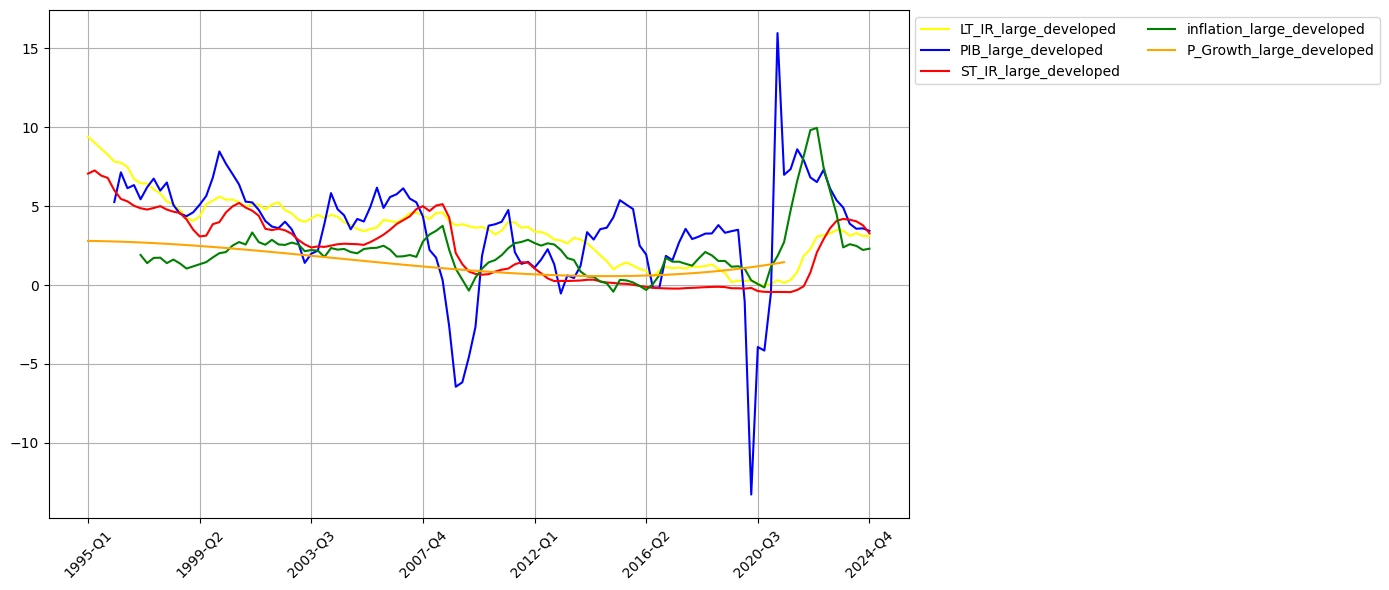

In [110]:
tracer_evolution(df_large_developed)

### Une première analyse exploratoire des séries temporelles <a class="anchor" id="partie24"></a>

Pour chaque variable, nous allons déterminer  le tendances et les saisonalités des séries temporelles. Compte tenu du nombre de pays dans notre échantillon, nous allons tout d'abord faire cette analyse pour la France et pour les principaux pays d'Europe. 

#### Données du PIB <a class="anchor" id="partie241"></a>

In [ ]:
#Fonction qui effectue la représentation de l'évolution du PIB d'un seul pays. 

def graphe_PIB(pays): 
    plt.figure(figsize=(14, 6))  # Taille du graphique

    plt.plot(df_TS.index, df_TS[f'PIB_{pays}'], marker='o', linestyle='-')

    plt.xlabel("Période")
    plt.ylabel("PIB en millions")
    plt.title(f"Évolution du PIB - {pays} (1995-2024)")

    #   Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
    num_ticks = 8  # Nombre de labels affichés sur l'axe X
    indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
    plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

    plt.grid(True)
    return(plt.show())


In [ ]:
#Représentation graphique de plusieurs pays
selected_countries = ['Austria', 'France', 'United_Kingdom','Spain', 'Italy', 'Netherlands', 'Switzerland'] #Ici pon peut choisir les pays que l'on veut
df_selected = df.loc[:,[f'PIB_{pays}' for pays in selected_countries]]

colors = plt.cm.get_cmap("tab10", len(df_selected.columns))  # Utilisation d'une palette de couleurs
plt.figure(figsize=(14, 6))

for i, country in enumerate(df_selected.columns): #enumerate permet de sélectionner l'élément et son indice
    plt.plot(df_selected.index, df_selected[country], label=country, color=colors(i))

# Personnalisation du graphique
plt.xlabel("Période")
plt.ylabel("PIB en Millions")
plt.title("Principaux PIB trimestriels en Europe ")

# Indicage
num_ticks = 8 
indices = np.linspace(0, len(df_selected.index) - 1, num_ticks, dtype=int)  
plt.xticks(df_selected.index[indices], rotation=45) 

# Affichage 
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)  # Légende en dehors du graphique
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #permet de ne pas avoir d'écriture scientifique
plt.show()

In [ ]:
#Représentation de la saisonalité
plt.figure()
tsaplots.quarter_plot(df_TS['PIB_France'].resample('Q').mean())
plt.show()

A première vue, il semblerait qu'il n'y ait pas de saisonalité pour le PIB

Ce qui suit est un brouillon qui nous sera utile lorsque nous aurons déterminé la stationnarité de la série temporelle

In [ ]:
#Autocorrélation (ACF)
plt.figure(figsize=(14,6))
tsaplots.plot_acf(df_TS['PIB_France'], lags=30)
plt.title("Fonction d'autocorrélation du PIB de la France")
plt.show()

#Remarque: on n'a pas encore vérifié que la série est stationnaire, donc l'intévalle de confiance peut-être biaisé


In [ ]:
#Autocorrélation partielle (PACF)
plt.figure(figsize=(14,6))
tsaplots.plot_pacf(df_TS['PIB_France'], lags=30)
plt.title("Fonction d'autocorrélation partielle du PIB de la France")
plt.show()

#### Données des Working Hours <a class="anchor" id="partie242"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['WH_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Nombre d'heures travaillées par semaine")
plt.title("Évolution du nombre d'heures travaillées en France(1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

La tendance décroissance du nombre d'heures travaillées en France peut s'expliquer par
- l'interpolation faite entre 1995-2002 (données annuelles disponibles uniquement)
- la mise en place des lois (nombre d'heures qui passe de 39 à 35)

#### Données des taux d'intérêt à long terme <a class="anchor" id="partie243"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['LT_IR_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Taux d'intérêt (Long Terme) de la France")
plt.title("Évolution du taux d'intérêt (long terme) de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

In [ ]:
#Représentation de la saisonalité
plt.figure()
tsaplots.quarter_plot(df_TS['LT_IR_France'].resample('Q').mean())
plt.show()

#### Données des taux d'intérêt à court terme <a class="anchor" id="partie244"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['ST_IR_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Taux d'intérêt (court terme)")
plt.title("Évolution du taux d'intérêt (court terme) de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

In [ ]:
#Représentation de la saisonalité
plt.figure()
tsaplots.quarter_plot(df_TS['ST_IR_France'].resample('Q').mean())
plt.show()

#### Données du CPI <a class="anchor" id="partie245"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['PIB_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("CPI")
plt.title("Évolution du du CPI de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

In [ ]:
#Représentation de la saisonalité
plt.figure()
tsaplots.quarter_plot(df_TS['PIB_France'].resample('Q').mean())
plt.show()

#### Données de la croissance potentielle <a class="anchor" id="partie246"></a>

In [ ]:
#Représentation graphique
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df_TS.index, df_TS['P_Growth_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Croissance potentielle")
plt.title("Évolution de la croissance potentielle de la France (1995-2021)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_TS.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df_TS.index[indices],df_TS.index[indices].to_period('Q').strftime('%Y-Q%q'),rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

## Visualisation <a class="anchor" id="partie3"></a>

### Données de PIB <a class="anchor" id="partie31"></a>

Pour notre rendu de mi-parcours nous avons présenté les évolutions des PIB en France et dans les principaux pays d'Europe. Nous faisons d'abord celui de la France.

In [ ]:
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df.index, df['PIB_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("PIB de la France")
plt.title("Évolution du PIB de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df.index[indices],rotation=45)  # Appliquer les labels espacés

plt.grid(True)
plt.show()

Et ensuite pour l'Europe

In [ ]:
selected_countries = ['PIB_Germany', 'PIB_France', 'PIB_United_Kingdom','PIB_Spain', 'PIB_Italy', 'PIB_Netherlands', 'PIB_Switzerland']

df_selected = df[selected_countries]

colors = plt.cm.get_cmap("tab10", len(df_selected.columns))  # Utilisation d'une palette de couleurs
plt.figure(figsize=(14, 6))

for i, country in enumerate(df_selected.columns): #enumerate permet de sélectionner l'élément et son indice
    plt.plot(df_selected.index, df_selected[country], label=country, color=colors(i))

# Personnalisation du graphique
plt.xlabel("Période")
plt.ylabel("PIB en Millions")
plt.title("Principaux PIB trimestriels en Europe ")

# Indicage
num_ticks = 8 
indices = np.linspace(0, len(df_selected.index) - 1, num_ticks, dtype=int)  
plt.xticks(df_selected.index[indices], rotation=45) 

# Affichage 
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)  # Légende en dehors du graphique
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #permet de ne pas avoir d'écriture scientifique
plt.show()


### Données d'heures travaillées <a class="anchor" id="partie32"></a>

Voici l'évolution des heures travaillées en France.

In [ ]:
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df.index, df['WH_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Heures travaillées en France")
plt.title("Évolution des heures travaillées en France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 10 
indices = np.linspace(0, len(df.index) - 1, num_ticks, dtype=int)
plt.xticks(df.index[indices], rotation=45)
plt.grid(True)
plt.show()